In [1]:
!unzip "/content/drive/MyDrive/Dataset.zip"

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: Training_Dataset/Normal/
  inflating: Training_Dataset/Normal/1.jpg  
  inflating: Training_Dataset/Normal/10 (2).jpg  
  inflating: Training_Dataset/Normal/10.driving-on-country-roads-1.jpg  
  inflating: Training_Dataset/Normal/10.g2vnvw1of2i11.jpg  
  inflating: Training_Dataset/Normal/10.island-road-trip-smooth-roads-road-trip-sunny-day-sky-having-cumulus-nimbus-clouds-along-empty-smooth-black-124987092.jpg  
  inflating: Training_Dataset/Normal/10.jpg  
  inflating: Training_Dataset/Normal/10.This-Is-the-Real-Difference-Between-Streets-Roads-and-Avenues_394392439-TTstudio-1024x684.jpg  
  inflating: Training_Dataset/Normal/100.5b23afff15e9f96fe6738e67.jpg  
  inflating: Training_Dataset/Normal/100.jpg  
  inflating: Training_Dataset/Normal/101.1946---N,-d-,09,-d-,93,-d-,04,-d-,04-driving.jpg  
  inflating: Training_Dataset/Normal/101.jpg  
  inflating: Training_Dataset/Normal/102.jpg  
  inflating: Training_Dataset/Normal/1

In [2]:
import tensorflow #keras-deep learning library library built on top of tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation #dense layer is fully connected layer.
#Dropout is to prevent your model from overfitting.
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.efficientnet import EfficientNetB6
from tensorflow.keras.applications.efficientnet import preprocess_input

In [3]:
#initializing the parameters
image_width,image_height=200,200  #height and width of acceptable images to the model
training_data_dir=r"/content/Training_Dataset"

testing_data_dir=r"/content/Testing_Dataset"
epochs=70 #70 times the model will learn from the data.
batch_size=20  #takes 20 samples from the dataset

In [4]:
import tensorflow.keras.backend as k
if k.image_data_format()=="channels_first":
  input_shape=(3,image_width,image_height)
else:
  input_shape=(image_width,image_height,3)

In [5]:
trained_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rescale=1./255, #rescaling the pixels in range 0-255 to 0-1.
                                 shear_range=0.2, #applies 20% shear strain over image .
                                 zoom_range=0.3, #adjust the zoom in the range of 1-0.3 to 1+0.3.
                                 horizontal_flip=True,vertical_flip=True, #flips the image vertically and horizontally.
                                 rotation_range=360, #rotates the image in range of 0 to 360.
                                 fill_mode='nearest', #after rotating, if the image has whitespaces created then they are filled with the nearest pixels.
                                 width_shift_range=0.2,height_shift_range=0.2, #shifts the image by 20% in horizontal and vertical directions.
                                 brightness_range=[0.4,1.5] #this are the brightness shift values range
                                 )

tested_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255, brightness_range=[0.4,1.5])
trained_generator=trained_datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                  classes=["Normal","Potholes","SpeedBumps"])

validated_generator=tested_datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                      classes=["Normal","Potholes","SpeedBumps"])

Found 1703 images belonging to 3 classes.
Found 440 images belonging to 3 classes.


In [6]:
model_i1=EfficientNetB6(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,
)
model_i1.summary()

165234480/165234480 [==============================] - 1s 0us/step
Model: "efficientnetb6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 200, 200, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 200, 200, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Resc

In [7]:
model_i1.trainable=True
set_trainable=False

for layer in model_i1.layers:
  if layer.name=='block2a_expand_conv':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in model_i1.layers:
  print(layer.name,layer.trainable)

input_1 False
rescaling False
normalization False
rescaling_1 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block1b_dwconv False
block1b_bn False
block1b_activation False
block1b_se_squeeze False
block1b_se_reshape False
block1b_se_reduce False
block1b_se_expand False
block1b_se_excite False
block1b_project_conv False
block1b_project_bn False
block1b_drop False
block1b_add False
block1c_dwconv False
block1c_bn False
block1c_activation False
block1c_se_squeeze False
block1c_se_reshape False
block1c_se_reduce False
block1c_se_expand False
block1c_se_excite False
block1c_project_conv False
block1c_project_bn False
block1c_drop False
block1c_add False
block2a_expand_conv True
block2a_expand_bn True
block2a_expand_activation T

In [8]:
# for layers in models1.layers:
#   layers.trainable=False

model_i1.summary()

Model: "efficientnetb6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 200, 200, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 200, 200, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 200, 200, 3)          0         ['normalization[0

In [9]:
#making classification layer to fit our model
from matplotlib.cbook import flatten
from tensorflow.keras import layers, models

flatten_layer=layers.Flatten()
dense_layer1=layers.Dense(50,activation='relu')

dense_layer2=layers.Dense(20,activation='relu')

predictionlayer=layers.Dense(3,activation='softmax')

model_i16=models.Sequential([model_i1,
                         flatten_layer,
                         dense_layer1,
                        Dropout(0.2),
                         dense_layer2,
                         Dropout(0.2),
                         predictionlayer]) #dropout after each dense layer deactivates the 20% nodes of the above layer randomly in each epoch.
model_i16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb6 (Functional  (None, 7, 7, 2304)        40960143  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 50)                5644850   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                        

In [10]:
from keras.optimizers import SGD


model_i16.compile(
    optimizer='SGD', loss='categorical_crossentropy',metrics='accuracy'
)

In [11]:
from keras.callbacks import ReduceLROnPlateau
reduced_lr= ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=0.0001)
callback_list=[reduced_lr]

In [12]:
traineed=model_i16.fit(trained_generator,steps_per_epoch=50,epochs=epochs, validation_data=validated_generator,shuffle=True, callbacks=callback_list)

Epoch 1/70
50/50 [==============================] - 122s 919ms/step - loss: 0.9669 - accuracy: 0.5630 - val_loss: 2.3472 - val_accuracy: 0.2886 - lr: 0.0100
Epoch 2/70
24/50 [=============>................] - ETA: 17s - loss: 0.7619 - accuracy: 0.6979

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 41s 815ms/step - loss: 0.6641 - accuracy: 0.7410 - val_loss: 1.5476 - val_accuracy: 0.3114 - lr: 0.0100
Epoch 3/70
50/50 [==============================] - 41s 812ms/step - loss: 0.5389 - accuracy: 0.7810 - val_loss: 1.7136 - val_accuracy: 0.3477 - lr: 0.0100
Epoch 4/70
50/50 [==============================] - 41s 817ms/step - loss: 0.5081 - accuracy: 0.8030 - val_loss: 1.2995 - val_accuracy: 0.3523 - lr: 0.0100
Epoch 5/70
50/50 [==============================] - 41s 810ms/step - loss: 0.4333 - accuracy: 0.8332 - val_loss: 1.0981 - val_accuracy: 0.4250 - lr: 0.0100
Epoch 6/70
50/50 [==============================] - 41s 826ms/step - loss: 0.4086 - accuracy: 0.8505 - val_loss: 1.1098 - val_accuracy: 0.4682 - lr: 0.0100
Epoch 7/70
50/50 [==============================] - 39s 773ms/step - loss: 0.3465 - accuracy: 0.8616 - val_loss: 0.4970 - val_accuracy: 0.7932 - lr: 0.0100
Epoch 8/70
50/50 [==============================] - 41s 826ms/step - loss: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


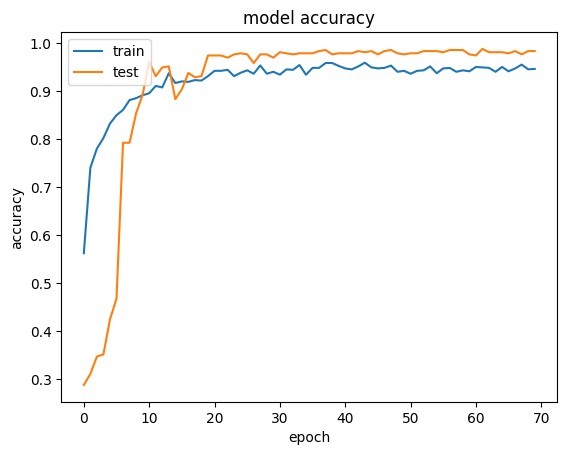

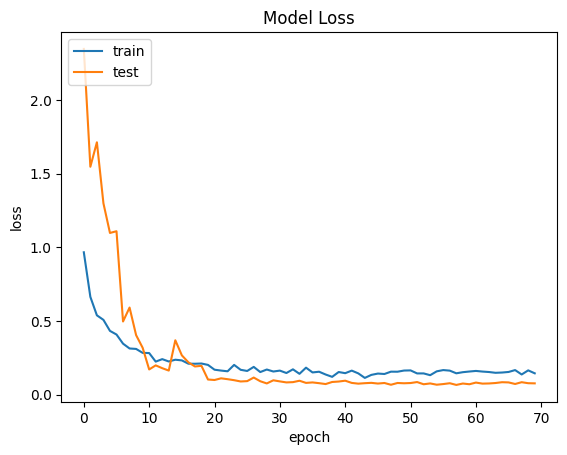

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(traineed.history.keys())
#summarize training for accuracy
plt.plot(traineed.history['accuracy'])
plt.plot(traineed.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()
#summarize training for loss
plt.plot(traineed.history['loss'])
plt.plot(traineed.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()